
# About Vegetation Indices

A vegetation index is a single value that quantifies vegetation health or structure.
The math associated with calculating a vegetation index is derived from the physics
of light reflection and absorption across bands. For instance, it is known that
healthy vegetation reflects light strongly in the near infrared band and less strongly
in the visible portion of the spectrum. Thus, if you create a ratio between light
reflected in the near infrared and light reflected in the visible spectrum, it
will represent areas that potentially have healthy vegetation.


## Normalized Difference Vegetation Index (NDVI)

The Normalized Difference Vegetation Index (NDVI) is a quantitative index of
greenness ranging from 0-1 where 0 represents minimal or no greenness and 1
represents maximum greenness.

NDVI is often used for a quantitate proxy measure of vegetation health, cover
and phenology (life cycle stage) over large areas.

<figure>
 <a href="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg">
 <img src="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg" alt="NDVI image from NASA that shows reflectance."></a>
    <figcaption>NDVI is calculated from the visible and near-infrared light
    reflected by vegetation. Healthy vegetation (left) absorbs most of the
    visible light that hits it, and reflects a large portion of
    near-infrared light. Unhealthy or sparse vegetation (right) reflects more
    visible light and less near-infrared light. Source: NASA
    </figcaption>
</figure>

* <a href="http://earthobservatory.nasa.gov/Features/MeasuringVegetation/measuring_vegetation_2.php" target="_blank">
More on NDVI from NASA</a>

## Calculate NDVI in Python

Sometimes you can download already calculated NDVI data products from a data provider. 

However, in this case, you don't have a pre calculated NDVI product from NAIP data. You need to calculate NDVI using the NAIP imagery / reflectance data that you have downloaded from Earth Explorer.

### How to Derive the NDVI Vegetation Index From Multispectral Imagery

The normalized difference vegetation index (NDVI) uses a ratio between near infrared
and red light within the electromagnetic spectrum. To calculate NDVI you use the
following formula where NIR is near infrared light and
red represents red light. For your raster data, you will take the reflectance value
in the red and near infrared bands to calculate the index.

`(NIR - Red) / (NIR + Red)`

You can perform this calculation using matrix math with the `numpy` library.

To get started, load all of the required python libraries. 

In [17]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es

# Set working directory 
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

mpl.rcParams['figure.figsize'] = (14, 14)
mpl.rcParams['axes.titlesize'] = 20

Next, open up the NAIP data that you wish to calculate NDVI with. You will use the data from 2015 for this example that you downloaded for week 7 of this course:

`data/cold-springs-fire/naip/m_3910505_nw_13_1_20150919/crop/m_3910505_nw_13_1_20150919_crop.tif`

In [18]:
with rio.open("data/cold-springs-fire/naip/m_3910505_nw_13_1_20150919/crop/m_3910505_nw_13_1_20150919_crop.tif") as src:
    naip_data = src.read()
    
# View shape of the data
naip_data.shape

(4, 2312, 4377)

Calculate NDVI using regular numpy array math. In this case, the bands you are subtracting come from the same data file. The tif file format requires that all layers are in the same CRS and of the same size so you assume the data line up. Thus you do not need to test the data for equal shape, crs and extent.

In [19]:
naip_ndvi = (naip_data[3] - naip_data[0]) / (naip_data[3] + naip_data[0])

Finally plot the data. Note below that the vmin and vmax attributes are used to stretch the colorbar across the full possible range of ndvi values (-1 to 1).

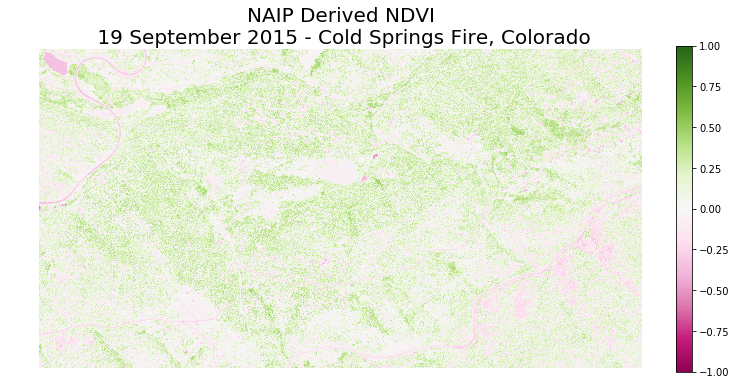

In [20]:
# Plot NDVI data
fig, ax = plt.subplots(figsize=(12,6))
ndvi = ax.imshow(naip_ndvi, cmap='PiYG',
                vmin=-1, vmax=1)
fig.colorbar(ndvi, fraction=.05)
ax.set(title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
ax.set_axis_off()
plt.show()

### View distribution of NDVI values

Using a histogram, you can view the distribution of pixel values in your NDVI output.

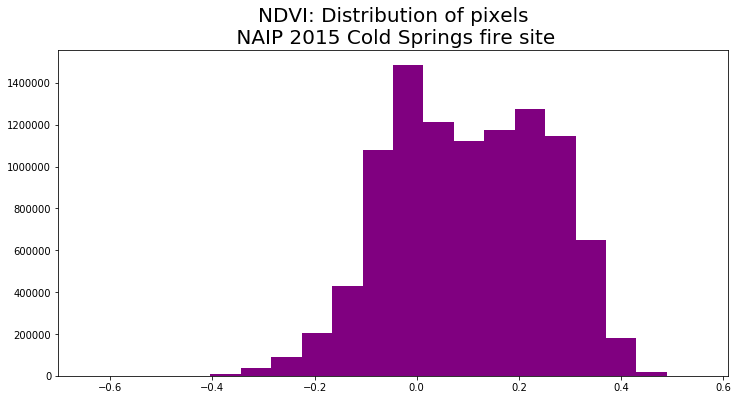

In [21]:
es.hist(naip_ndvi,
       figsize=(12,6),
       titles=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

<div class="notice--info" markdown="1">

## Additional Resources

* <a href="https://phenology.cr.usgs.gov/ndvi_foundation.php" target="_blank">USGS Remote Sensing Phenology</a>
* <a href="http://earthobservatory.nasa.gov/Features/MeasuringVegetation/measuring_vegetation_2.php" target="_blank">NASA Earth Observatory - Vegetation Indices</a>

</div>